In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from tqdm import tqdm

In [2]:
data = pd.read_excel('fullerene_experiments.xlsx')

In [3]:
data

,Concentration,Force,Average temperature
0,0.1,72,23.0
1,0.1,112,25.0
2,0.1,200,52.0
3,0.2,72,22.0
4,0.2,112,24.0
5,0.2,200,47.0
6,0.3,72,22.0
7,0.3,112,24.0
8,0.3,200,42.0
9,0.4,72,22.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Concentration        48 non-null     float64
 1   Force                48 non-null     int64  
 2   Average temperature  48 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.2 KB


In [5]:
filename = 'd.json'
with open(filename) as f:
    r = json.load(f)

In [6]:
df = pd.DataFrame({'Temperature_gradient': r})

In [7]:
data['Temperature_gradient'] = df['Temperature_gradient'] 

In [8]:
data['Average temperature'] = data['Average temperature'].astype('int')
data['Temperature_gradient'] = data['Temperature_gradient'].astype('int')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Concentration         48 non-null     float64
 1   Force                 48 non-null     int64  
 2   Average temperature   48 non-null     int64  
 3   Temperature_gradient  48 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.6 KB


In [10]:
features = data.drop(['Average temperature', 'Temperature_gradient'], axis=1)
target = data['Average temperature'] 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    train_size = 0.67, 
                                                    random_state=42)

In [12]:
best_model_rf = None
accuracy_RandomForest = 0
best_est = 0
best_depth = 0
for est in tqdm(range(10, 31, 10)):
    for depth in range (1, 51):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(X_train, y_train)
        predicted_valid = model.predict(X_test)
        result_rf = accuracy_score(y_test, predicted_valid) 
        if result_rf > accuracy_RandomForest:
            best_model_rf = model
            accuracy_RandomForest = result_rf
            best_est = est
            best_depth = depth

print("Accuracy наилучшей модели на валидационной выборке:", accuracy_RandomForest, '\n'
      "Количество деревьев:", best_est,'\n' "Максимальная глубина:", best_depth)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.35it/s]

Accuracy наилучшей модели на валидационной выборке: 0.6875 
Количество деревьев: 10 
Максимальная глубина: 3


In [13]:
best_model_dt = None
accuracy_DecisionTree = 0
best_depths = 0
for depths in tqdm(range (1, 101)):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depths) 
    model.fit(X_train, y_train)
    predicted_valid = model.predict(X_test) 
    result_dt = accuracy_score(y_test, predicted_valid) 
    if result_dt > accuracy_DecisionTree:
        best_model_dt = model
        accuracy_DecisionTree = result_dt
        best_depths = depths
print("Accuracy лучшей модели:", accuracy_DecisionTree, '\n'"Максимальная глубина:", best_depths)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 815.04it/s]

Accuracy лучшей модели: 0.6875 
Максимальная глубина: 4


In [14]:
%%time
# Оценивание эффективности выполнения алгоритма логистической регрессии 
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
predicted_valid = model.predict(X_test)
accuracy_LogisticRegression = accuracy_score(y_test, predicted_valid) 
print("Accuracy модели на валидационной выборке:", accuracy_LogisticRegression)

Accuracy модели на валидационной выборке: 0.5
CPU times: user 117 ms, sys: 4.22 ms, total: 121 ms
Wall time: 120 ms


/Users/moonkerimka/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
model = RandomForestClassifier(random_state=12345, n_estimators=10, max_depth=3) 
model.fit(X_train, y_train)
predicted_valid = model.predict(X_test)
print(accuracy_score(y_test, predicted_valid))

0.6875


In [16]:
y_test = y_test.reset_index()
y_test['Average temperature']

0     19
1     21
2     27
3     21
4     20
5     21
6     21
7     23
8     24
9     23
10    42
11    22
12    22
13    19
14    19
15    24
Name: Average temperature, dtype: int64

In [17]:
grad = []
for i in [27, 40, 26, 43, 24, 37, 12, 19, 4, 25, 8, 3, 6, 39, 33, 13]:
    grad.append(data.iloc[i,[3]])
grad = [8, 9, 26, 8, 9, 10, 12, 16, 26, 14, 41, 16, 15, 6, 7, 19]

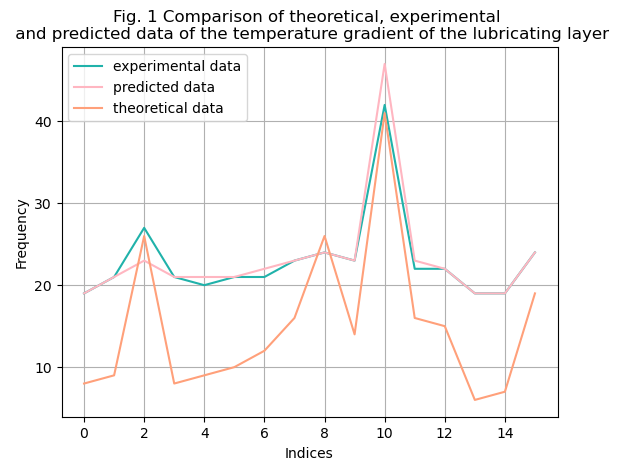

In [18]:
plt.plot(y_test['Average temperature'], label='experimental data', color='lightseagreen')
plt.plot(predicted_valid, label='predicted data', color='lightpink');
plt.plot(grad, label='theoretical data', color='lightsalmon');
plt.title('Fig. 1 Comparison of theoretical, experimental \n and predicted data of the temperature gradient of the lubricating layer')
plt.xlabel('Indices')
plt.ylabel('Frequency')
plt.grid();
plt.legend();
plt.savefig('images/comparation.png')